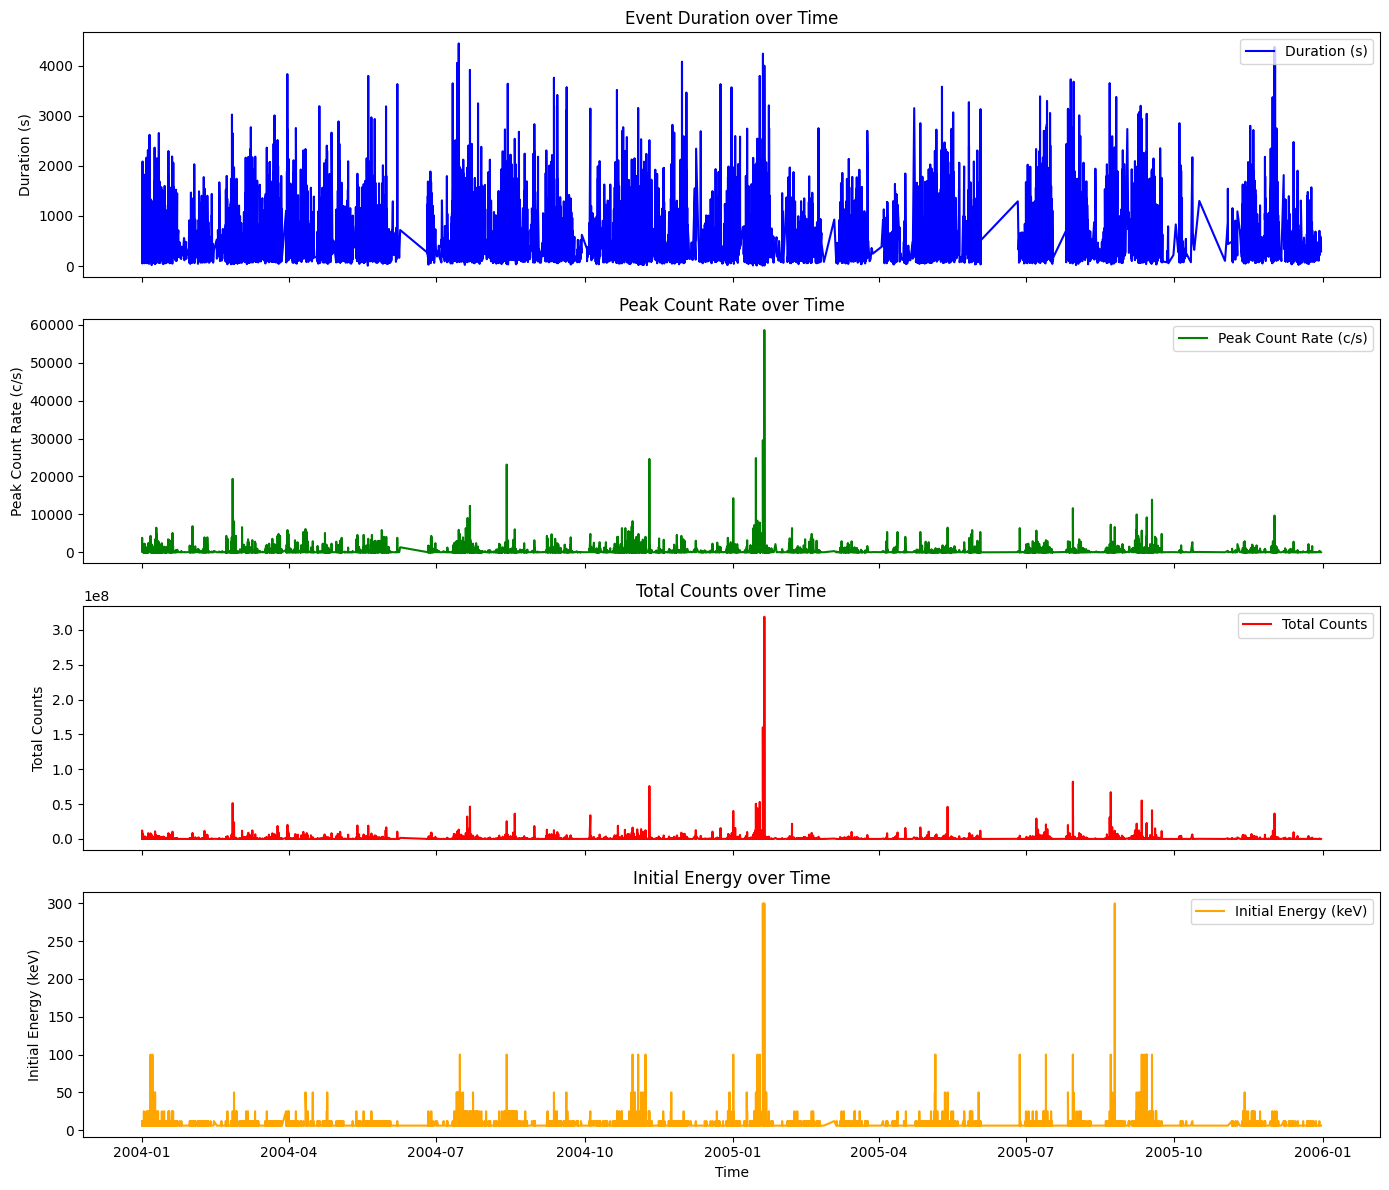

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
solar_flare_new_data = pd.read_csv('C:\\Users\\shahi\\OneDrive\\Desktop\\Fatema_NASA\\Solar_flare_RHESSI_2004_05.csv')

# Convert 'dt.start' to datetime for better plotting
solar_flare_new_data['dt.start'] = pd.to_datetime(solar_flare_new_data['dt.start'])

# Plotting the time series of 'duration.s', 'peak.c/s', 'total.counts', and 'energy.kev.i'
fig, axs = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

# Plot duration.s
axs[0].plot(solar_flare_new_data['dt.start'], solar_flare_new_data['duration.s'], label='Duration (s)', color='blue')
axs[0].set_ylabel('Duration (s)')
axs[0].set_title('Event Duration over Time')
axs[0].legend(loc='upper right')

# Plot peak.c/s
axs[1].plot(solar_flare_new_data['dt.start'], solar_flare_new_data['peak.c/s'], label='Peak Count Rate (c/s)', color='green')
axs[1].set_ylabel('Peak Count Rate (c/s)')
axs[1].set_title('Peak Count Rate over Time')
axs[1].legend(loc='upper right')

# Plot total.counts
axs[2].plot(solar_flare_new_data['dt.start'], solar_flare_new_data['total.counts'], label='Total Counts', color='red')
axs[2].set_ylabel('Total Counts')
axs[2].set_title('Total Counts over Time')
axs[2].legend(loc='upper right')

# Plot energy.kev.i
axs[3].plot(solar_flare_new_data['dt.start'], solar_flare_new_data['energy.kev.i'], label='Initial Energy (keV)', color='orange')
axs[3].set_ylabel('Initial Energy (keV)')
axs[3].set_xlabel('Time')
axs[3].set_title('Initial Energy over Time')
axs[3].legend(loc='upper right')

plt.tight_layout()
plt.show()


In [3]:
import pandas as pd

# Load the solar flare dataset
solar_flare_data = pd.read_csv('C:\\Users\\shahi\\OneDrive\\Desktop\\Fatema_NASA\\Solar_flare_RHESSI_2004_05.csv')

# Display the first few rows to understand the structure
print(solar_flare_data.head())

# Convert 'dt.start' to datetime
solar_flare_data['dt.start'] = pd.to_datetime(solar_flare_data['dt.start'])


   duration.s  peak.c/s  total.counts energy.kev  x.pos.asec  y.pos.asec  \
0         196       592      644352.0       6-12        -966        -207   
1         588       592     1838208.0       6-12        -967        -200   
2         712      1456     2815104.0      12-25         964         172   
3        1096      3824    12128496.0      12-25        -972        -137   
4         452       200      476352.0       6-12        -978        -249   

   radial  active.region.ar flag.1 flag.2  ... flag.4 flag.5  \
0     988               536     A0     DR  ...     P1     Q2   
1     987               536     A0     DR  ...     Q1    NaN   
2     979               528     A0     P1  ...    NaN    NaN   
3     982                 0     A0     DR  ...     PE     Q2   
4    1009               536     A0     DR  ...     P1  PE Q3   

              dt.start              dt.peak               dt.end  year  month  \
0  2004-01-01 00:39:36  2004-01-01 00:40:06  2004-01-01 00:42:52  2004      1

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Convert 'dt.start' to datetime
solar_flare_data['dt.start'] = pd.to_datetime(solar_flare_data['dt.start'])

# Feature Selection
features = ['duration.s', 'peak.c/s', 'total.counts', 'energy.kev.i']
data = solar_flare_data[features]

# Fill missing values (if any)
data.fillna(method='ffill', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Convert the data to numpy arrays
data_scaled = np.array(data_scaled)

# Split the data into train and test sets
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Prepare the data for LSTM
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step)])
        Y.append(dataset[i + time_step])
    return np.array(X), np.array(Y)

# Create the training and testing datasets
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("Training and testing data prepared for LSTM!")


C:\Users\shahi\AppData\Local\Temp\ipykernel_12044\3851632338.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\shahi\AppData\Local\Temp\ipykernel_12044\3851632338.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(method='ffill', inplace=True)


Training and testing data prepared for LSTM!


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()

# First LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=X_train.shape[2]))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Save the model
model.save('solar_flare_forecasting_model.h5')

print("Model training completed and saved!")


C:\Users\shahi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 89s 143ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 2/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 65s 150ms/step - loss: 0.0026 - val_loss: 0.0032
Epoch 3/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 60s 138ms/step - loss: 0.0025 - val_loss: 0.0032
Epoch 4/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 58s 133ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 5/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 59s 135ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 6/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 58s 134ms/step - loss: 0.0026 - val_loss: 0.0032
Epoch 7/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 104s 185ms/step - loss: 0.0027 - val_loss: 0.0032
Epoch 8/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 100s 226ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 9/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 77s 77ms/step - loss: 0.0025 - val_loss: 0.0032
Epoch 10/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - loss: 0.0023 - val_loss: 0.0032
Epoch 11/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - loss: 0.0023 - val_loss: 0.0032
Epoch 12/50
436/436 

Model training completed and saved!


In [6]:
# Evaluate the model on test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')


108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0034
Test Loss: 0.0032231907825917006


In [7]:
# Make predictions on the test set
predictions = model.predict(X_test)


108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step


In [8]:
# Inverse scale the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test)


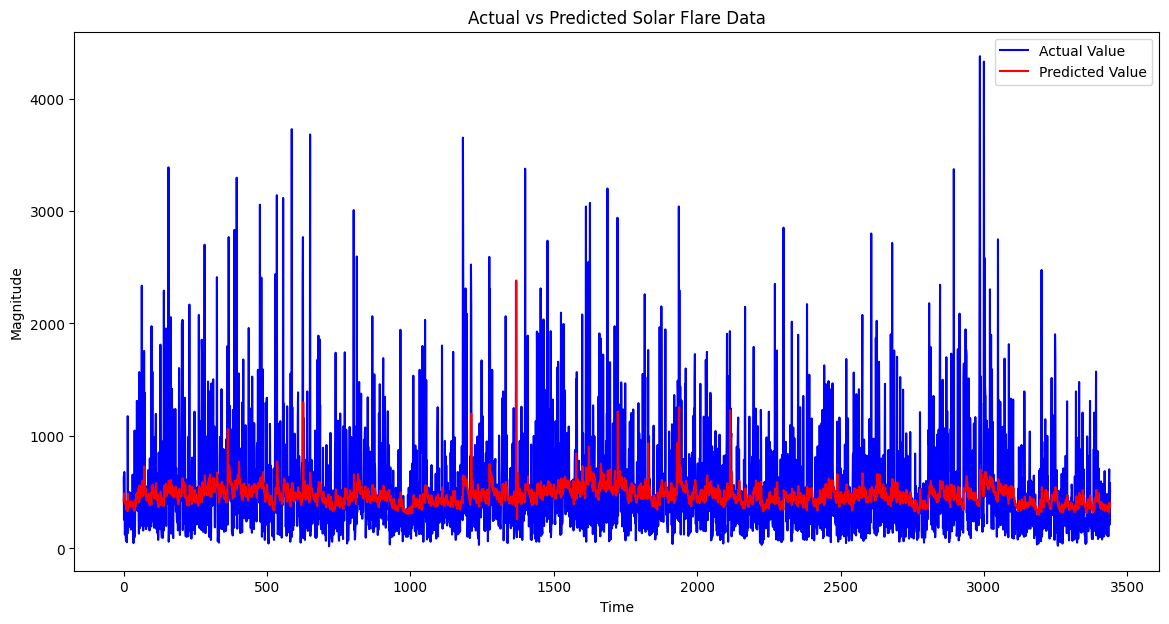

In [9]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled[:, 0], label='Actual Value', color='blue')
plt.plot(predictions[:, 0], label='Predicted Value', color='red')
plt.title('Actual vs Predicted Solar Flare Data')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.legend()
plt.show()
